# VEM 2.HF

## Importok:

In [1]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)

## Adatok:

In [2]:
#Data 1222

code_2=int(input("KÓD2="))
code_3=int(input("KÓD3="))
code_4=int(input("KÓD4="))

#Code 2

if code_2==1:
    a=1.2
    m_0=15
elif code_2==2:
    a=1.7
    m_0=20
elif code_2==3:
    a=2.1
    m_0=25
elif code_2==4:
    a=2.6
    m_0=30

#Code 3

if code_3==1:
    b=5
    d=25
elif code_3==2:
    b=6
    d=35
elif code_3==3:
    b=7
    d=45
elif code_3==4:
    b=8
    d=55

#Code 4

if code_4==1:
    E=170
    ρ=6000
elif code_4==2:
    E=190
    ρ=6500
elif code_4==3:
    E=210
    ρ=7000
elif code_4==4:
    E=230
    ρ=7500

#Change to SI

E=E*10**9
d=d/1000

## Előre definiált függvények:

In [3]:
#Functions

#SubMatrix

def SubMatrix(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mx[i,j] = Mx[rows[i]-1,rows[j]-1]
    return sp.Matrix(mx)

#ExtMatrix

def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

#SubVector

def SubVector(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, 1))
    for i in range(n):
        mx[i, 0] = Mx[rows[i]-1, 0]
    return sp.Matrix(mx)

## 2.feladat: Két elem használata

## Elemek jellemzői:

In [4]:
#2.feladat

print("2.feladat:")

#Keresztmetszeti jellemzők 

print("\nKeresztmetszeti jellemzők:")

A=d**2*np.pi/4
print("\nA=",A,"[m^2]")

Iz=d**4*np.pi/64
print("Iz=",Iz,"[m^4]")

#Rudak hosszai

print("\nRudak hosszai:")

L_1_a=b
print("\nL_1=",L_1_a,"[m]")

L_2_a=a
print("L_2=",L_2_a,"[m]")

2.feladat:

Keresztmetszeti jellemzők:

A= 0.0009621127501618742 [m^2]
Iz= 7.366175743426852e-08 [m^4]

Rudak hosszai:

L_1= 6 [m]
L_2= 1.7 [m]


## Merevségi mátrixok meghatározása:


Merevségi mátrixok:

K_1_a=


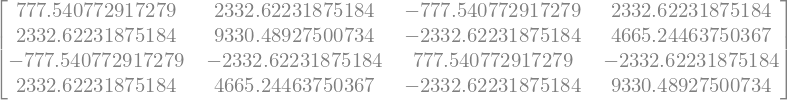


K_2_a=


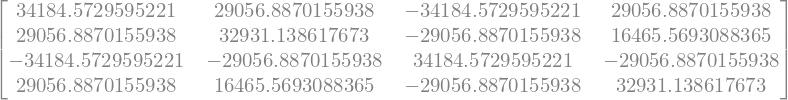


Globális merevségi mátrix:

K_glob_a=


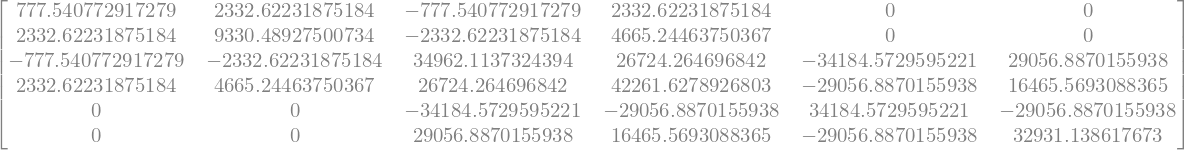

In [5]:
#Merevségi mátrixok

print("\nMerevségi mátrixok:")

def K_matrix(L):
    K=Iz*E/(L**3)*sp.Matrix([[12,6*L,-12,6*L],
                              [6*L,4*L**2,-6*L,2*L**2],
                              [-12,-6*L,12,-6*L],
                              [6*L,2*L**2,-6*L,4*L**2]])
    return K

#Elemenként

K_1_a=K_matrix(L_1_a)
print("\nK_1_a=")
display(K_1_a)

K_2_a=K_matrix(L_2_a)
print("\nK_2_a=")
display(K_2_a)

#Globális merevségi mátrix

print("\nGlobális merevségi mátrix:")

#Elem-csomopont osszerendeles

ecs_a = sp.Matrix([[1,2],[2,3]])

eDOF1_a = [2*ecs_a[0,0]-1, 2*ecs_a[0,0], 2*ecs_a[0,1]-1, 2*ecs_a[0,1]]
eDOF2_a = [2*ecs_a[1,0]-1, 2*ecs_a[1,0], 2*ecs_a[1,1]-1, 2*ecs_a[1,1]]

K_glob_a = sp.Matrix(ExtMatrix(K_1_a, eDOF1_a, 6) + ExtMatrix(K_2_a, eDOF2_a, 6))

print("\nK_glob_a=")
display(K_glob_a)

## Tömeg mátrixok meghatározása:


Tömeg mátrixok meghatározása:

M_1_a=


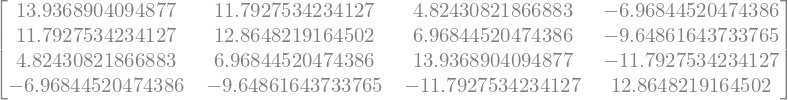

M_2_a=


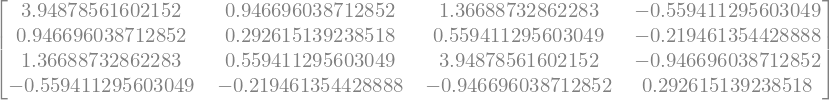


Globális tömegmátrix:

M_a=


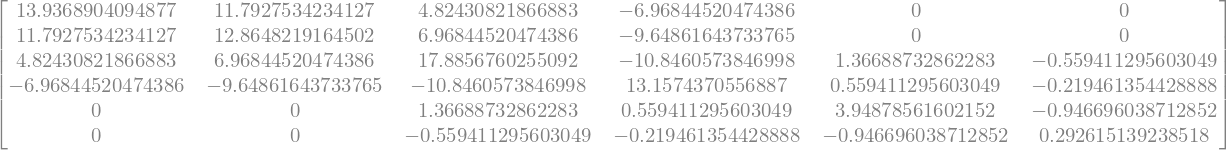

In [6]:
#Tömeg mátrixok

print("\nTömeg mátrixok meghatározása:")

def M_i(L_i):
    M_i=ρ*A*L_i/420*sp.Matrix([[156,22*L_i,54,-13*L_i],
                           [22*L_i,4*L_i**2,13*L_i,-3*L_i**2],
                           [54,13*L_i,156,-22*L_i],
                           [-13*L_i,-3*L_i**2,-22*L_i,4*L_i**2]])
    return M_i

#Elemként

M_1_a=M_i(L_1_a)
print("\nM_1_a=")
display(M_1_a)

M_2_a=M_i(L_2_a)
print("M_2_a=")
display(M_2_a)

#Globális tömeg mátrix

print("\nGlobális tömegmátrix:")

M_a = sp.Matrix(ExtMatrix(M_1_a, eDOF1_a, 6) + ExtMatrix(M_2_a, eDOF2_a, 6))
print("\nM_a=")
display(M_a)

## Kondenzált mennyiségek meghatározása:

Kondenzált merevségi mátrix:

K_kond_a=


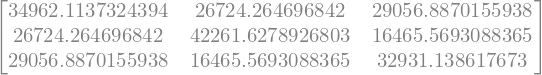


Kondenzált tömeg mátrix:

M_kond_a=


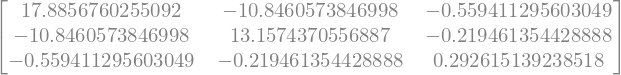

In [7]:
#Kondenzált mennyiségek meghatározása

#Kondenzált merevségi mátrix

print("Kondenzált merevségi mátrix:")

freeDoF_a=sp.Matrix([[3,4,6]])

K_kond_a=SubMatrix(K_glob_a,freeDoF_a)

print("\nK_kond_a=")
display(K_kond_a)

#Kondenzált tömeg mátrix

print("\nKondenzált tömeg mátrix:")

M_kond_a=SubMatrix(M_a,freeDoF_a)

print("\nM_kond_a=")
display(M_kond_a)

## Sajátfrekvenciák meghatározása:

In [8]:
#Sajátkörfrekvenciák meghatározása:

print("Sajátkörfrekvenciák meghatározása:")

#Symbol

α=sp.Symbol("α")

#Alpha Calculation

def alpha(K_i,M_i):
    alpha_eq=(K_i-α**2*M_i).det()
    alphas=sp.solve(alpha_eq,α**2)
    α_vec = sp.Matrix([[sp.re(α)**0.5 for α in alphas]])
    return α_vec

#Sajátkörfrekvenciák

print("\nSajátkörfrekvenciák értékei:")

α_a=alpha(K_kond_a,M_kond_a)

α_1_a=α_a[0]
print("\nα_1_a=",α_1_a,"[rad/s]")

α_2_a=α_a[1]
print("α_2_a=",α_2_a,"[rad/s]")

α_3_a=α_a[2]
print("α_3_a=",α_3_a,"[rad/s]")

#Sajátfrekveniák

print("\nSajátfrekvenciák értékei:")

def freq(alpha_i):
    f_i=alpha_i/(2*np.pi)
    return f_i

f_1_a=freq(α_1_a)
print("\nf_1_a=",f_1_a,"[Hz]")

f_2_a=freq(α_2_a)
print("f_2_a=",f_2_a,"[Hz]")

f_3_a=freq(α_3_a)
print("f_3_a=",f_3_a,"[Hz]")

Sajátkörfrekvenciák meghatározása:

Sajátkörfrekvenciák értékei:

α_1_a= 12.9841840805991 [rad/s]
α_2_a= 80.2581464683013 [rad/s]
α_3_a= 436.723118131087 [rad/s]

Sajátfrekvenciák értékei:

f_1_a= 2.06649707844244 [Hz]
f_2_a= 12.7734807338235 [Hz]
f_3_a= 69.5066430130682 [Hz]


## 3.feladat: Három elem használata

## Elemek jellemzői:

In [9]:
#3.feladat

print("3.feladat:")

#Rudak hosszai

print("\nRudak hosszai:")

L_1_b=b/2
print("\nL_1=",L_1_b,"[m]")

L_2_b=b/2
print("L_2=",L_2_b,"[m]")

L_3_b=a
print("L_3=",L_3_b,"[m]")

3.feladat:

Rudak hosszai:

L_1= 3.0 [m]
L_2= 3.0 [m]
L_3= 1.7 [m]


## Merevségi mátrixok meghatározása:


Merevségi mátrixok:

K_1_b=


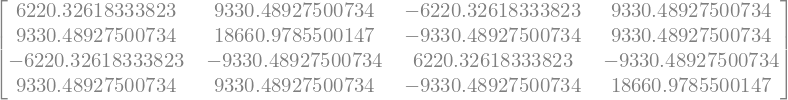


K_2_b=


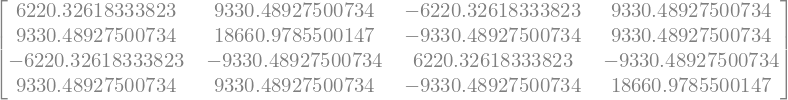


K_3_b=


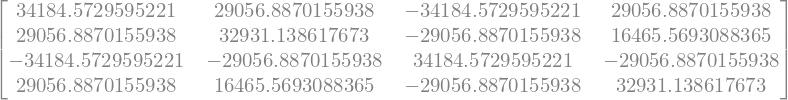


Globális merevségi mátrix:

K_glob_b=


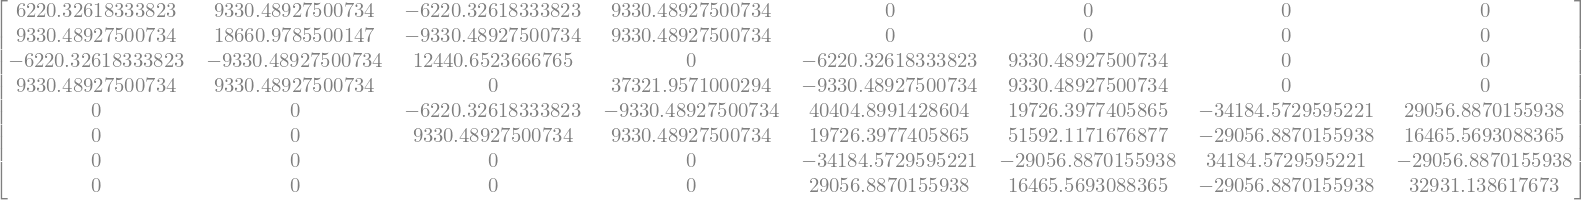

In [10]:
#Merevségi mátrixok

print("\nMerevségi mátrixok:")

#Elemenként

K_1_b=K_matrix(L_1_b)
print("\nK_1_b=")
display(K_1_b)

K_2_b=K_matrix(L_2_b)
print("\nK_2_b=")
display(K_2_b)

K_3_b=K_matrix(L_3_b)
print("\nK_3_b=")
display(K_3_b)

#Globális merevségi mátrix

print("\nGlobális merevségi mátrix:")

#Elem-csomopont osszerendeles

ecs_b = sp.Matrix([[1,2],[2,3],[3,4]])

eDOF1_b = [2*ecs_b[0,0]-1, 2*ecs_b[0,0], 2*ecs_b[0,1]-1, 2*ecs_b[0,1]]
eDOF2_b = [2*ecs_b[1,0]-1, 2*ecs_b[1,0], 2*ecs_b[1,1]-1, 2*ecs_b[1,1]]
eDOF3_b = [2*ecs_b[2,0]-1, 2*ecs_b[2,0], 2*ecs_b[2,1]-1, 2*ecs_b[2,1]]

K_glob_b = sp.Matrix(ExtMatrix(K_1_b, eDOF1_b, 8) + ExtMatrix(K_2_b, eDOF2_b, 8)+ ExtMatrix(K_3_b, eDOF3_b, 8))

print("\nK_glob_b=")
display(K_glob_b)

## Tömeg mátrixok meghatározása:


Tömeg mátrixok meghatározása:

M_1_b=


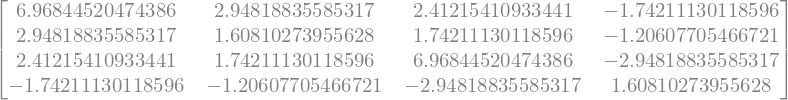

M_2_b=


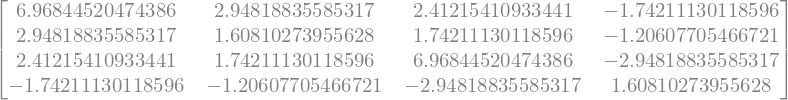

M_3_b=


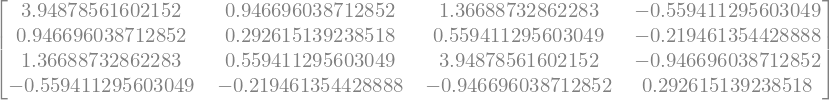


Globális tömegmátrix:

M_b=


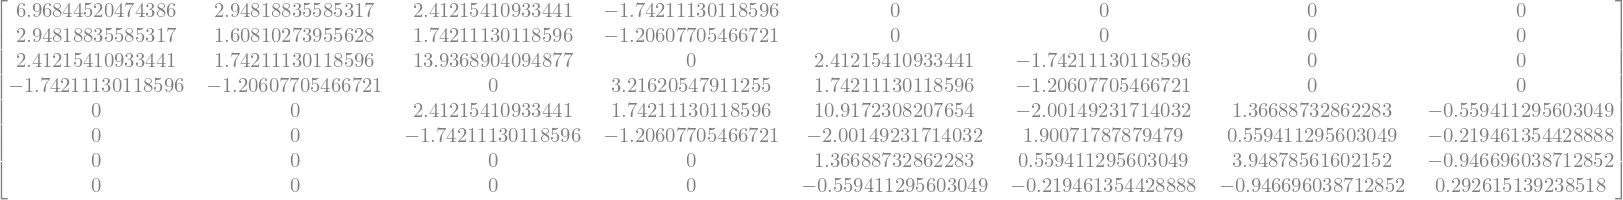

In [11]:
#Tömeg mátrixok

print("\nTömeg mátrixok meghatározása:")

#Elemként

M_1_b=M_i(L_1_b)
print("\nM_1_b=")
display(M_1_b)

M_2_b=M_i(L_2_b)
print("M_2_b=")
display(M_2_b)

M_3_b=M_i(L_3_b)
print("M_3_b=")
display(M_3_b)

#Globális tömeg mátrix

print("\nGlobális tömegmátrix:")

M_b = sp.Matrix(ExtMatrix(M_1_b, eDOF1_b, 8) + ExtMatrix(M_2_b, eDOF2_b, 8)+ ExtMatrix(M_3_b, eDOF3_b, 8))
print("\nM_b=")
display(M_b)

## Kondenzált mennyiségek meghatározása:

Kondenzált merevségi mátrix:

K_kond_b=


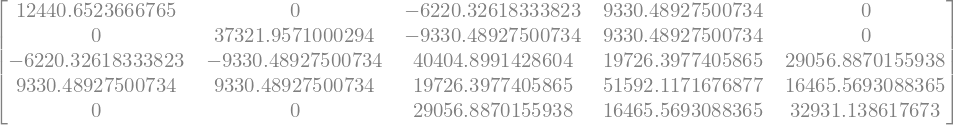


Kondenzált tömeg mátrix:

M_kond_b=


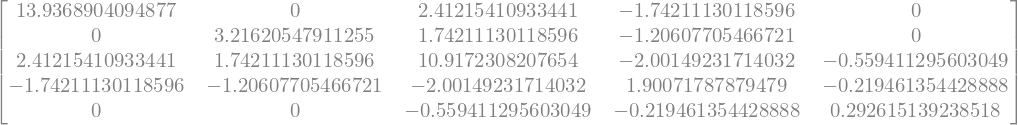

In [12]:
#Kondenzált mennyiségek meghatározása

#Kondenzált merevségi mátrix

print("Kondenzált merevségi mátrix:")

freeDoF_b=sp.Matrix([[3,4,5,6,8]])

K_kond_b=SubMatrix(K_glob_b,freeDoF_b)

print("\nK_kond_b=")
display(K_kond_b)

#Kondenzált tömeg mátrix

print("\nKondenzált tömeg mátrix:")

M_kond_b=SubMatrix(M_b,freeDoF_b)

print("\nM_kond_b=")
display(M_kond_b)

## Sajátfrekvenciák meghatározása:

In [23]:
#Sajátkörfrekvenciák meghatározása:

print("Sajátkörfrekvenciák meghatározása:")

#Sajátkörfrekvenciák

def alpha(K_i,M_i):
    alpha_eq=sp.det(K_i-α**2*M_i)
    alphas=sp.solve(alpha_eq,α**2)
    α_vec = sp.Matrix([[sp.re(α)**0.5 for α in alphas]])
    return α_vec


print("\nSajátkörfrekvenciák értékei:")

α_b=alpha(K_kond_b,M_kond_b)

α_1_b=α_b[0]
print("\nα_1_b=",α_1_b,"[rad/s]")

α_2_b=α_b[1]
print("α_2_b=",α_2_b,"[rad/s]")

α_3_b=α_b[2]
print("α_3_b=",α_3_b,"[rad/s]")

#Sajátfrekvenciák

print("\nSajátfrekvenciák értékei:")

f_1_b=freq(α_1_b)
print("\nf_1_b=",f_1_b,"[Hz]")

f_2_b=freq(α_2_b)
print("f_2_b=",f_2_b,"[Hz]")

f_3_b=freq(α_3_b)
print("f_3_b=",f_3_b,"[Hz]")

Sajátkörfrekvenciák meghatározása:

Sajátkörfrekvenciák értékei:


KeyboardInterrupt: 